## 8.4 循环神经网络 (RNNs)
如上所述，隐藏层是在从输入到输出的路径上（以观测角度来理解）的隐藏的层， 而隐状态则是在给定步骤所做的任何事情（以技术角度来定义）的输入， 并且这些状态只能通过先前时间步的数据来计算。  
循环神经网络（recurrent neural networks，RNNs） 是具有隐状态的神经网络。

### 8.4.1 无隐状态的神经网络
隐藏层输出 $\mathbf{H} \in \mathbb{R}^{n \times h}$ :
$$
\mathbf{H} = \phi(\mathbf{X} \mathbf{W}_{xh} + \mathbf{b}_h).
$$
输出层输出 $\mathbf{O} \in \mathbb{R}^{n \times q}$ :
$$
\mathbf{O} = \mathbf{H} \mathbf{W}_{hq} + \mathbf{b}_q.
$$

### 8.4.2 有隐状态的神经网络
与多层感知机不同的是， 我们在这里保存了前一个时间步的隐藏变量 $\mathbf{H}_{t-1}$ ， 并引入了一个新的权重参数 $\mathbf{W}_{hh} \in \mathbb{R}^{h \times h}$
， 来描述如何在当前时间步中使用前一个时间步的隐藏变量。
$$
\mathbf{H}_t = \phi(\mathbf{X}_t \mathbf{W}_{xh} + \mathbf{H}_{t-1} \mathbf{W}_{hh}  + \mathbf{b}_h).
$$
从相邻时间步的隐藏变量 $\mathbf{H}_{t-1}$ 和 $\mathbf{H}_{t}$ 之间的关系可知， 这些变量捕获并保留了序列直到其当前时间步的历史信息， 就如当前时间步下神经网络的状态或记忆， 因此这样的隐藏变量被称为*隐状态*（hidden state）。 由于在当前时间步中， 隐状态使用的定义与前一个时间步中使用的定义相同， 因此 (8.4.5)的计算是*循环的*（recurrent）。 于是基于循环计算的隐状态神经网络被命名为 *循环神经网络*（recurrent neural network）。 在循环神经网络中执行 (8.4.5)计算的层 称为*循环层*（recurrent layer）。  
输出层的输出类似于多层感知机中的计算：
$$
\mathbf{O}_t = \mathbf{H}_t \mathbf{W}_{hq} + \mathbf{b}_q.
$$
在任意时间步 $t$ ，隐状态的计算可以被视为：
1. 拼接当前时间步 $t$ 的输入 $\mathbf{X}_t$ 和前一时间步 $t$ 的隐状态 $\mathbf{H}_{t-1}$;
2. 将拼接的结果送入带有激活函数 $\phi$ 的全连接层。 全连接层的输出是当前时间步 $t$ 的隐状态 $\mathbf{H}_t$;
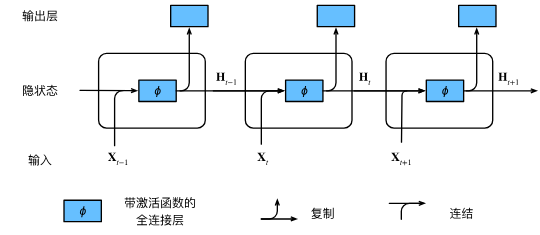

In [1]:
import torch
from d2l import torch as d2l

X, W_xh = torch.normal(0, 1, (3, 1)), torch.normal(0, 1, (1, 4))
H, W_hh = torch.normal(0, 1, (3, 4)), torch.normal(0, 1, (4, 4))
torch.matmul(X, W_xh) + torch.matmul(H, W_hh)

c:\Users\yy200\miniconda3\envs\d2l\lib\site-packages\torchvision\io\image.py:14: UserWarning: Failed to load image Python extension: '[WinError 127] 找不到指定的程序。'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


tensor([[-1.3403, -1.3674, -0.9277,  0.4406],
        [ 0.5764,  0.1829,  1.6707, -1.1000],
        [-1.4644, -1.7661, -0.1926, -0.0867]])

In [2]:
torch.matmul(torch.cat((X, H), 1), torch.cat((W_xh, W_hh), 0))

tensor([[-1.3403, -1.3674, -0.9277,  0.4406],
        [ 0.5764,  0.1829,  1.6707, -1.1000],
        [-1.4644, -1.7661, -0.1926, -0.0867]])

### 8.4.3. 基于循环神经网络的字符级语言模型
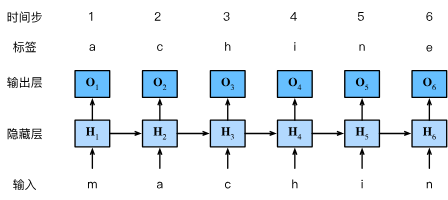

### 8.4.4. 困惑度（Perplexity）
我们可以通过计算序列的似然概率来度量模型的质量。 然而这是一个难以理解、难以比较的数字。
在这里，信息论可以派上用场了。 我们在引入softmax回归 （ 3.4.7节）时定义了熵、惊异和交叉熵， 并在信息论的在线附录 中讨论了更多的信息论知识。 如果想要压缩文本，我们可以根据当前词元集预测的下一个词元。 一个更好的语言模型应该能让我们更准确地预测下一个词元。 因此，它应该允许我们在压缩序列时花费更少的比特。 所以我们可以通过一个序列中所有的 $n$个词元的交叉熵损失的平均值来衡量：
$$
\frac{1}{n} \sum_{t=1}^n -\log P(x_t \mid x_{t-1}, \ldots, x_1),
$$
自然语言处理的科学家更喜欢使用一个叫做*困惑度*（perplexity）的量:
$$
\exp\left(-\frac{1}{n} \sum_{t=1}^n \log P(x_t \mid x_{t-1}, \ldots, x_1)\right).
$$
困惑度的最好的理解是“下一个词元的实际选择数的调和平均数”。 我们看看一些案例。
- 在最好的情况下，模型总是完美地估计标签词元的概率为1。 在这种情况下，模型的困惑度为1。
- 在最坏的情况下，模型总是预测标签词元的概率为0。 在这种情况下，困惑度是正无穷大。
- 在基线上，该模型的预测是词表的所有可用词元上的均匀分布。 在这种情况下，困惑度等于词表中唯一词元的数量。 事实上，如果我们在没有任何压缩的情况下存储序列， 这将是我们能做的最好的编码方式。 因此，这种方式提供了一个重要的上限， 而任何实际模型都必须超越这个上限。


### 8.4.6 练习解答

1. **如果我们使用循环神经网络来预测文本序列中的下一个字符，那么任意输出所需的维度是多少？**  
    如果词表大小为 $v$，则输出是一个长度为 $v$ 的概率分布向量，因此输出所需的维度是 $v$。

2. **为什么循环神经网络可以基于文本序列中所有先前的词元，在某个时间步表示当前词元的条件概率？**  
    循环神经网络通过隐状态 $\mathbf{H}_t$ 捕获了序列的历史信息。隐状态 $\mathbf{H}_t$ 是通过前一个时间步的隐状态 $\mathbf{H}_{t-1}$ 和当前时间步的输入 $\mathbf{X}_t$ 共同计算得到的：  
    $$
    \mathbf{H}_t = \phi(\mathbf{X}_t \mathbf{W}_{xh} + \mathbf{H}_{t-1} \mathbf{W}_{hh} + \mathbf{b}_h).
    $$  
    这种递归计算使得 $\mathbf{H}_t$ 能够包含从序列开始到当前时间步的所有历史信息，从而可以表示当前词元的条件概率。

3. **如果基于一个长序列进行反向传播，梯度会发生什么状况？**  
    在长序列中进行反向传播时，梯度可能会出现消失或爆炸的情况。  
    - 梯度消失：当权重矩阵的特征值小于 1 时，梯度会随着时间步的增加逐渐衰减，导致前面时间步的梯度几乎为 0。  
    - 梯度爆炸：当权重矩阵的特征值大于 1 时，梯度会随着时间步的增加呈指数增长，导致数值不稳定。

4. **与本节中描述的语言模型相关的问题有哪些？**  
    - 长期依赖问题：循环神经网络在处理长序列时，可能无法有效捕获远距离的依赖关系。  
    - 计算效率：循环神经网络的计算是序列化的，难以并行化，导致训练速度较慢。  
    - 梯度问题：如前所述，梯度消失和梯度爆炸会影响模型的训练效果。  
    - 模型容量：简单的循环神经网络可能不足以捕获复杂的语言模式，需要更复杂的变体（如 LSTM 或 GRU）来改进性能。